In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
from pandas.tools.plotting import table

In [26]:
#import data files into dataframes
datadf = pd.read_csv('TotalData.csv')

[40132812168.0, 20597267426.0, 7253169649.0]
['Music', 'Entertainment', 'Film & Animation']
[[13664675784.0, 13170993855.0, 3704057497.0], [5025695464.0, 3778121557.0, 1989962151.0], [40132812168.0, 20597267426.0, 7253169649.0], [171097185713.0, 29167091020.0, 8330568650.0]]


C:\Users\snigd\Anaconda3\lib\site-packages\matplotlib\figure.py:457: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "
C:\Users\snigd\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1331: UserWarning: findfont: Font family ['Helvetica'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


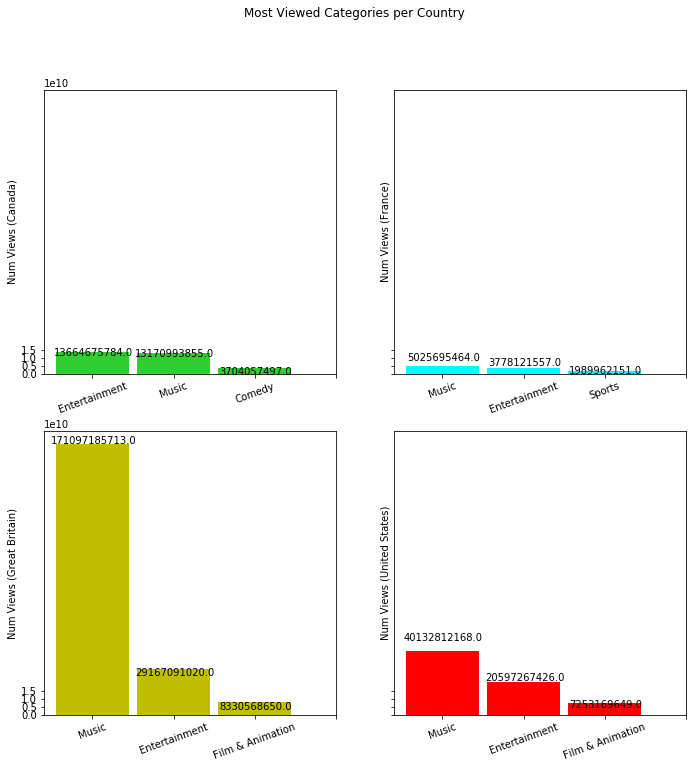

In [27]:
#what is the most viewed category (bar plot, one for each country with the plot being category vs. num views, and we can label it)
countryGroup = datadf.groupby(['Country','Category Name'])

catViews = countryGroup.agg({'Num Views':'sum'})
catViews = catViews['Num Views'].groupby(level=0, group_keys=False)
caCat = []
caViews = []
frCat = []
frViews = []
gbCat = []
gbViews = []
usCat = []
usViews = []
for country, newdf in catViews:
    countrydf = newdf.nlargest()[:3]
    countrydf = countrydf.reset_index()
    if country=='CA':
        for views in countrydf['Num Views']:
            caViews.append(views)
        for cat in countrydf['Category Name']:
            caCat.append(cat)
    if country == 'FR':
        for views in countrydf['Num Views']:
            frViews.append(views)
        for cat in countrydf['Category Name']:
            frCat.append(cat)
    if country == 'GB':
        for views in countrydf['Num Views']:
            gbViews.append(views)
        for cat in countrydf['Category Name']:
            gbCat.append(cat)
    if country == 'US':
        for views in countrydf['Num Views']:
            usViews.append(views)
        for cat in countrydf['Category Name']:
            usCat.append(cat)

print(usViews)
print(usCat)
xaxis = np.arange(3)
fig, axes = plt.subplots(2,2,figsize=[11.5,11.5],sharey=True)
#0,0 is canada
#0,1 is France
#1,0 is GB
#1,1 is US
axes[0,0].bar(xaxis,caViews,color='g',width=-0.9)
axes[0,1].bar(xaxis,frViews,color='b',width=-0.9)
axes[1,0].bar(xaxis,gbViews,color='r',width=-0.9)
axes[1,1].bar(xaxis,usViews,color='y',width=-0.9)
colors = ['limegreen','cyan','r','y']
#fontcolors = ['black','white','black','black']
views = [caViews,frViews,usViews,gbViews]
labelheight = [1.2,2.7,1.3,1.03]
print(views)
def autolabel(views):
    idxNum1 = 0
    idxNum2 = 0
    colorNum = 0
    for countryarray in views:
        labelcount=0
        bars = axes[idxNum1,idxNum2].bar(xaxis,countryarray,color=colors[colorNum],width=-0.9)
        for eachbar in bars:
            height = eachbar.get_height()
            axes[idxNum1,idxNum2].text(eachbar.get_x() + eachbar.get_width()/2.05, labelheight[colorNum]*height,
                   countryarray[labelcount],
                    ha='center',va='top',
                   color='black', fontname='Helvetica')
            labelcount+=1
        colorNum+=1
        #0,0
        if idxNum1==0 and idxNum2==0:
            idxNum2+=1
        #0,1
        elif idxNum1==0 and idxNum2==1:
            idxNum1+=1
        #1,1
        elif idxNum1==1 and idxNum2==1:
            idxNum2-=1
        #1,0
        
# Call functions to implement the function calls
autolabel(views)

axes[0,0].set_yticks(np.arange(1,2e10,5e9))
axes[0,0].set_xticks(np.arange(0,4,1))
axes[0,1].set_xticks(np.arange(0,4,1))
axes[1,0].set_xticks(np.arange(0,4,1))
axes[1,1].set_xticks(np.arange(0,4,1))

axes[0,0].set_ylabel('Num Views (Canada)')
axes[0,1].set_ylabel('Num Views (France)')
axes[1,0].set_ylabel('Num Views (Great Britain)')
axes[1,1].set_ylabel('Num Views (United States)')

axes[0,0].set_xticklabels(caCat,rotation=20)
axes[0,1].set_xticklabels(frCat,rotation=20)
axes[1,0].set_xticklabels(gbCat,rotation=20)
axes[1,1].set_xticklabels(usCat,rotation=20)
fig.suptitle('Most Viewed Categories per Country')
fig.show()
fig.savefig('MostViewedCatSAMESCALE.png')

['Childish Gambino - This Is America (Official Video)', 'Ariana Grande - No Tears Left To Cry', "BTS (방탄소년단) 'FAKE LOVE' Official MV"]
['Music', 'Music', 'Music']
[3758488765.0, 1529291326.0, 1283188291.0]
[[631428335.0, 577553186.0, 411775069.0], [254277636.0, 167542474.0, 153765066.0], [8201898179.0, 6891280759.0, 6101309613.0], [3758488765.0, 1529291326.0, 1283188291.0]]


C:\Users\snigd\Anaconda3\lib\site-packages\matplotlib\figure.py:457: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "
C:\Users\snigd\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1331: UserWarning: findfont: Font family ['Helvetica'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


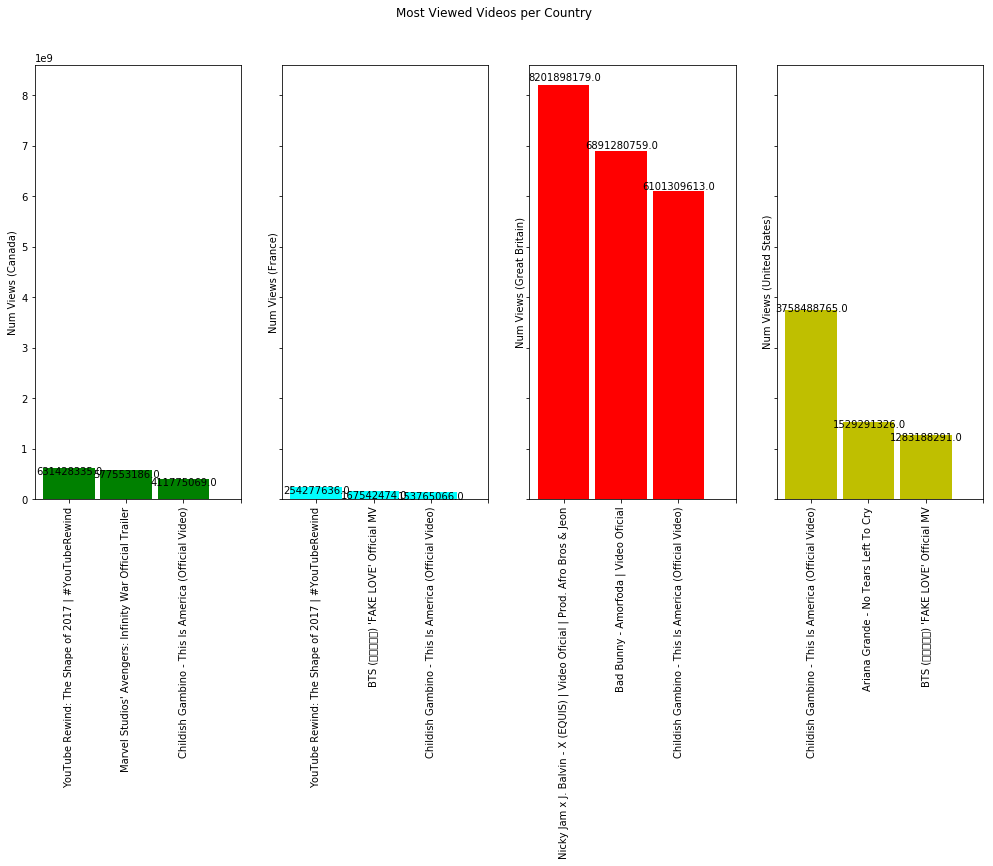

In [28]:
#most viewed videos for each country (Same thing as above, label with video and views and category)
videoGroup = datadf.groupby(['Country','Title','Category Name']).agg({'Num Views':'sum'})
videoGroup = videoGroup['Num Views'].groupby(level=0, group_keys=False)
caCat = []
caVids = []
caViews = []
frCat = []
frVids = []
frViews = []
gbCat = []
gbVids = []
gbViews = []
usCat = []
usVids = []
usViews = []
for country, newdf in videoGroup:
    countrydf = newdf.nlargest()[:3]
    countrydf = countrydf.reset_index()
    if country=='CA':
        for views in countrydf['Num Views']:
            caViews.append(views)
        for cat in countrydf['Category Name']:
            caCat.append(cat)
        for vid in countrydf['Title']:
            caVids.append(vid)
    if country == 'FR':
        for views in countrydf['Num Views']:
            frViews.append(views)
        for cat in countrydf['Category Name']:
            frCat.append(cat)
        for vid in countrydf['Title']:
            frVids.append(vid)
    if country == 'GB':
        for views in countrydf['Num Views']:
            gbViews.append(views)
        for cat in countrydf['Category Name']:
            gbCat.append(cat)
        for vid in countrydf['Title']:
            gbVids.append(vid)
    if country == 'US':
        for views in countrydf['Num Views']:
            usViews.append(views)
        for cat in countrydf['Category Name']:
            usCat.append(cat)
        for vid in countrydf['Title']:
            usVids.append(vid)
print(usVids)
print(usCat)
print(usViews)
fig, axes = plt.subplots(1,4,figsize=[17,8],sharey=True)
#0 is canada
#1 is France
#2 is GB
#3 is US
colors = ['g','cyan','r','y']
#fontcolors = ['black','white','black','black']
views = [caViews,frViews,gbViews,usViews]
print(views)
def autolabel(views):
    idxNum = 0
    for countryarray in views:
        labelcount=0
        bars = axes[idxNum].bar(xaxis,countryarray,color=colors[idxNum],width=-0.9)
        for eachbar in bars:
            height = eachbar.get_height()
            axes[idxNum].text(eachbar.get_x() + eachbar.get_width()/2.05, 1.03*height,
                   countryarray[labelcount],
                    ha='center',va='top',
                   color='black', fontname='Helvetica')
            labelcount+=1
        idxNum+=1
# Call functions to implement the function calls
autolabel(views)

axes[0].set_xticks(np.arange(0,4,1))
axes[1].set_xticks(np.arange(0,4,1))
axes[2].set_xticks(np.arange(0,4,1))
axes[3].set_xticks(np.arange(0,4,1))

axes[0].set_ylabel('Num Views (Canada)')
axes[1].set_ylabel('Num Views (France)')
axes[2].set_ylabel('Num Views (Great Britain)')
axes[3].set_ylabel('Num Views (United States)')

axes[0].set_xticklabels(caVids,rotation=90)
axes[1].set_xticklabels(frVids,rotation=90)
axes[2].set_xticklabels(gbVids,rotation=90)
axes[3].set_xticklabels(usVids,rotation=90)



fig.suptitle('Most Viewed Videos per Country')
fig.show()
fig.savefig('MostViewedVidsSAMESCALE.png')

In [29]:
#what is the most liked/disliked category (same things as above, one plot for liked and one for disliked)
likes = countryGroup.agg({'Num Likes':'sum'})
likes = likes['Num Likes'].groupby(level=0, group_keys=False)
dislikes = countryGroup.agg({'Num Dislikes':'sum'})
dislikes = dislikes['Num Dislikes'].groupby(level=0, group_keys=False)

likeCountry = []
likeNum = []
likeCat = []
for country, newdf in likes:
    countrydf = newdf.nlargest()[:3]
    countrydf = countrydf.reset_index()
    #print(countrydf)
    if country=='CA':
        for likes in countrydf['Num Likes']:
            likeNum.append(likes)
        for cat in countrydf['Category Name']:
            likeCat.append(cat)
            likeCountry.append(country)
    if country=='FR':
        for likes in countrydf['Num Likes']:
            likeNum.append(likes)
        for cat in countrydf['Category Name']:
            likeCat.append(cat)
            likeCountry.append(country)
    if country=='GB':
        for likes in countrydf['Num Likes']:
            likeNum.append(likes)
        for cat in countrydf['Category Name']:
            likeCat.append(cat)
            likeCountry.append(country)
    if country=='US':
        for likes in countrydf['Num Likes']:
            likeNum.append(likes)
        for cat in countrydf['Category Name']:
            likeCat.append(cat)
            likeCountry.append(country)

dislikeCountry = []
dislikeNum = []
dislikeCat = []

for country, newdf in dislikes:
    countrydf = newdf.nlargest()[:3]
    countrydf = countrydf.reset_index()
    if country=='CA':
        for dislikes in countrydf['Num Dislikes']:
            dislikeNum.append(likes)
        for cat in countrydf['Category Name']:
            dislikeCat.append(cat)
            dislikeCountry.append(country)
    if country=='FR':
        for dislikes in countrydf['Num Dislikes']:
            dislikeNum.append(likes)
        for cat in countrydf['Category Name']:
            dislikeCat.append(cat)
            dislikeCountry.append(country)
    if country=='GB':
        for dislikes in countrydf['Num Dislikes']:
            dislikeNum.append(likes)
        for cat in countrydf['Category Name']:
            dislikeCat.append(cat)
            dislikeCountry.append(country)
    if country=='US':
        for dislikes in countrydf['Num Dislikes']:
            dislikeNum.append(likes)
        for cat in countrydf['Category Name']:
            dislikeCat.append(cat)
            dislikeCountry.append(country)

likesdf = pd.DataFrame({
    'Country':likeCountry,
    'Num Likes':likeNum,
    'Category':likeCat
})
likesdf
likesdf.to_csv('MostLikedCats.csv')

dislikesdf = pd.DataFrame({
    'Country':dislikeCountry,
    'Num Likes':dislikeNum,
    'Category':dislikeCat
})
dislikesdf
dislikesdf.to_csv('MostDislikedCats.csv')

In [30]:
#THIS BOX IS USELESS IF WE'RE NOT RUNNING THE NEXT ONE
#most common tags totally, not by country (Top 10 tags, and number of uses)
#taglist = datadf['Tags']
#sepTags = []
#templist=[]
#for tag in taglist:
#    if isinstance(tag,str):
#        toappend = tag.split('|')
#        templist.append(toappend)
    #print(len(templist))
#cleaned = []
#for entry in templist:
    #if only one tag, you don't want to split the characters in the next step so append it now
#    if len(entry)==1:
#        cleaned.append(entry[0].strip('"'))
#    for word in entry:
#        #make sure it's not just a meaningless letter or a one-word entry that has been split to chars
#        if len(word) > 1:
#            cleaned.append(word.strip('"'))
#cleaned

In [31]:
#THIS BOX RUNS FOREVER BECAUSE TAG LIST IS V LONG, MAYBE TRY A DIFF METHOD? OTHERWISE NOT DOING THIS PART
#uniquetags = []
#uniquetags.append(cleaned[0])
#match = False
#for tag in cleaned:
#    for unique in uniquetags:
#        if tag==unique:
#            match = True
#            break
#    if match==True:
#        match = False
#        continue
#    else:
#        uniquetags.append(tag)
#uniquetags

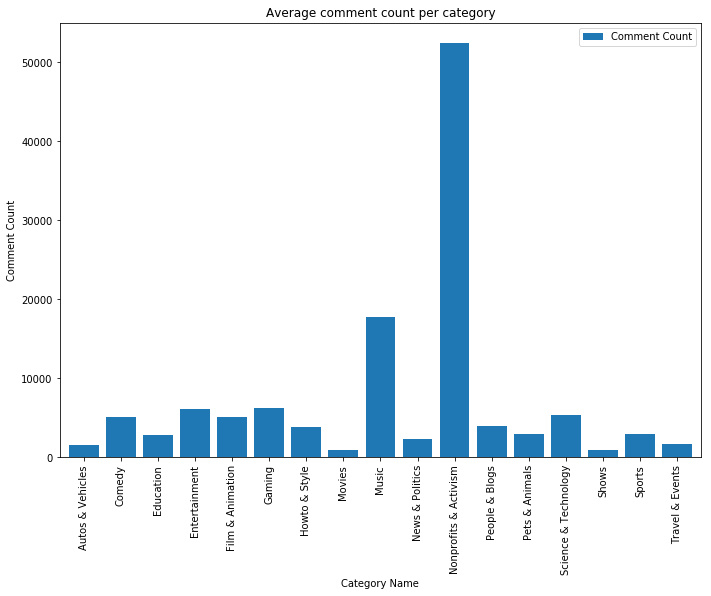

<Figure size 432x288 with 0 Axes>

In [32]:
#Average comment count for each category (bar plot)
catGroup = datadf.groupby(['Category Name']).agg({'Comment Count':'mean'})
catGroup = catGroup.dropna(axis=0, how = 'any')
catGroup = catGroup.drop(['Trailers'])
    
catGroup.plot(kind='bar', figsize=[11.5,8], width = 0.8)

plt.ylabel('Comment Count')
plt.title('Average comment count per category')
plt.show()
plt.savefig('AvgCommentCt.png')

['ChildishGambinoVEVO', 'ibighit', 'Dude Perfect', 'Marvel Entertainment', 'ArianaGrandeVevo']
[3758488765.0, 2235906679.0, 1870085178.0, 1806126076.0, 1576959172.0]


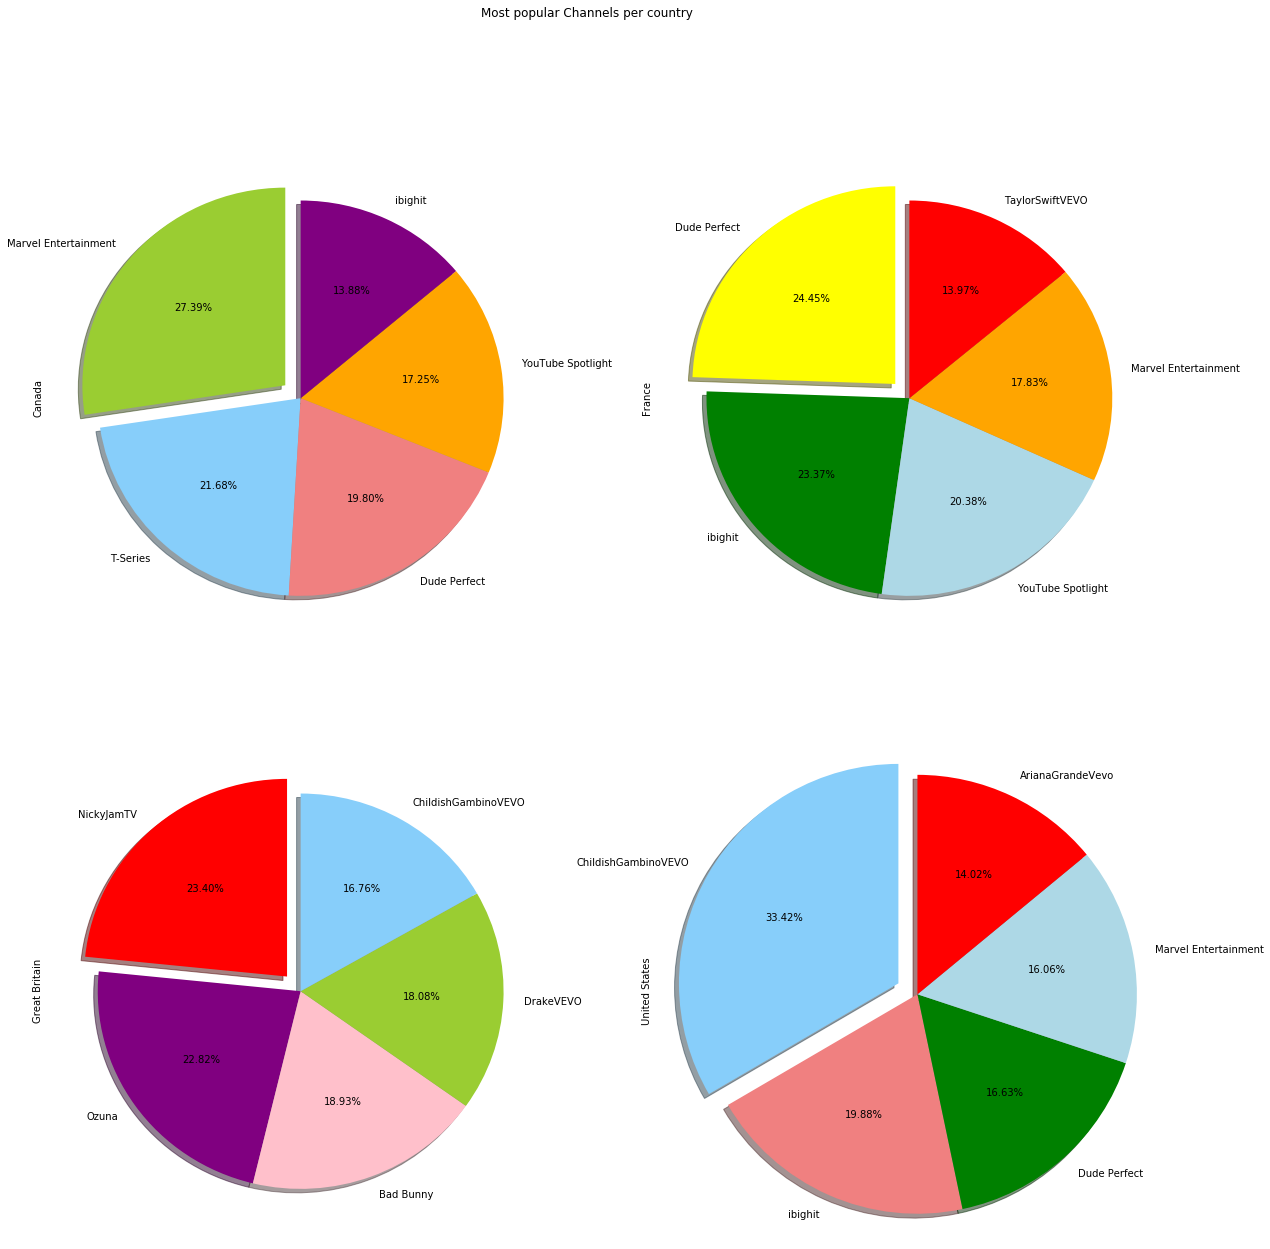

In [33]:
#5 most popular channels in each country (Pie chart, one for each country, separate based on channels' views, label the slices)
channelpop = datadf.groupby(['Country','Channel Title','Category Name']).agg({'Num Views':'sum'})
channelpop = channelpop['Num Views'].groupby(level=0, group_keys=False)
canChanns = []
canViews = []
fraChanns = []
fraViews = []
gbChanns = []
gbViews = []
usChanns = []
usViews = []

for country, newdf in channelpop:
    countrydf = newdf.nlargest()[:5]
    countrydf = countrydf.reset_index()
    if country=='CA':
        for views in countrydf['Num Views']:
            canViews.append(views)
        for chann in countrydf['Channel Title']:
            canChanns.append(chann)
    if country == 'FR':
        for views in countrydf['Num Views']:
            fraViews.append(views)
        for chann in countrydf['Channel Title']:
            fraChanns.append(chann)
    if country == 'GB':
        for views in countrydf['Num Views']:
            gbViews.append(views)
        for chann in countrydf['Channel Title']:
            gbChanns.append(chann)
    if country == 'US':
        for views in countrydf['Num Views']:
            usViews.append(views)
        for chann in countrydf['Channel Title']:
            usChanns.append(chann)
print(usChanns)
print(usViews)

fig,ax = plt.subplots(2,2,figsize=[20,20])
#0,0 - ca
#0,1 - fr
#1,0 - gb
#1,1 - us
explode = [0.1,0,0,0,0]
colors = ["yellowgreen","lightskyblue","lightcoral","orange","purple"]
colors2 = ["yellow","green","lightblue","orange","red"]
colors3 = ["red","purple","pink","yellowgreen","lightskyblue"]
colors4 = ["lightskyblue","lightcoral","green","lightblue","red"]
ax[0,0].pie(canViews, labels=canChanns,explode=explode,colors=colors,
           shadow=True,startangle=90, autopct = '%.2f%%')
ax[0,1].pie(fraViews, labels=fraChanns,explode=explode,colors=colors2,
           shadow=True,startangle=90, autopct = '%.2f%%')
ax[1,0].pie(gbViews, labels=gbChanns,explode=explode,colors=colors3,
           shadow=True,startangle=90, autopct = '%.2f%%')
ax[1,1].pie(usViews, labels=usChanns,explode=explode,colors=colors4,
           shadow=True,startangle=90, autopct = '%.2f%%')
plt.axis("equal")

ax[0,0].set_ylabel('Canada')
ax[0,1].set_ylabel('France')
ax[1,0].set_ylabel('Great Britain')
ax[1,1].set_ylabel('United States')


fig.suptitle('Most popular Channels per country')
fig.savefig('MostpopChannels.png')

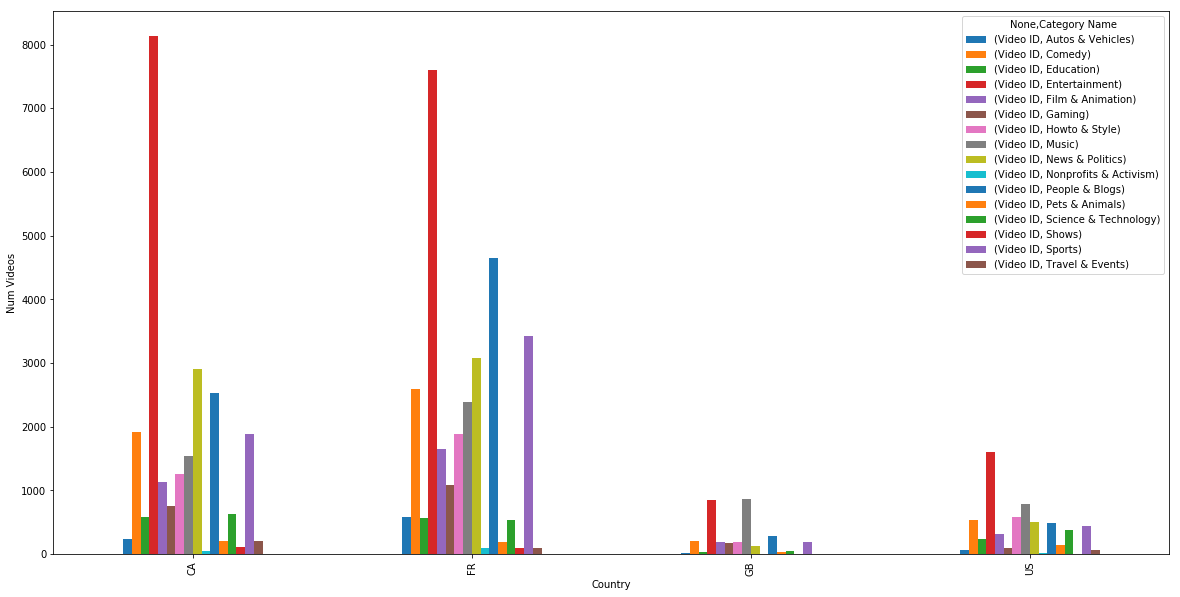

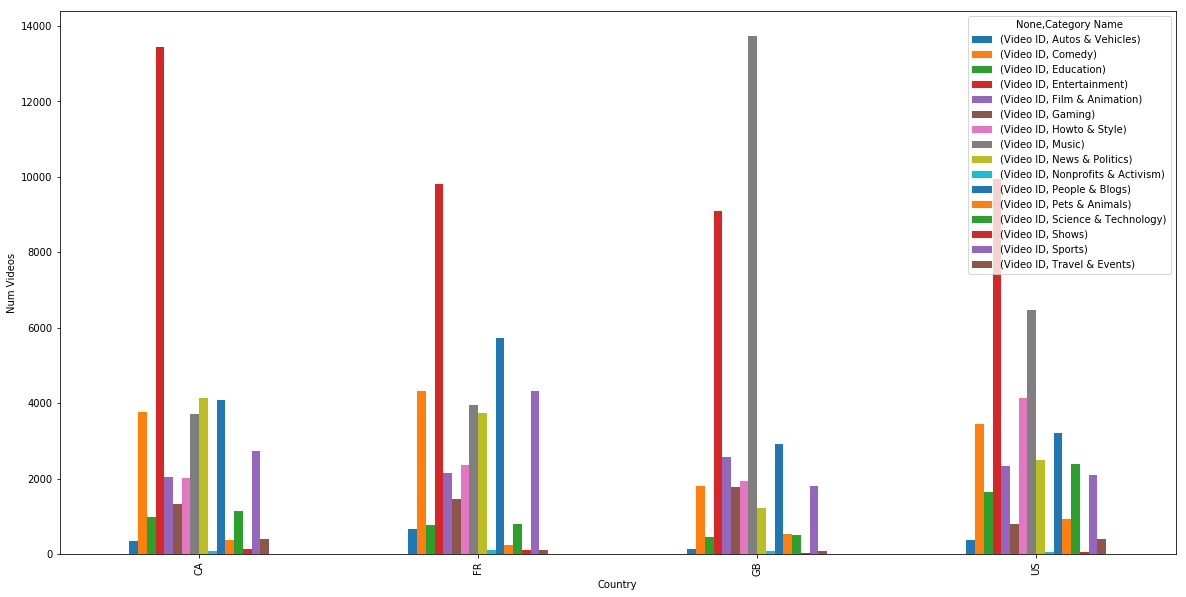

In [34]:
#number of videos per category for each country (table/dataframe)
#FIND A WAY TO DELETE THE 2 LEVEL INDEX (VIDEO ID) FROM THE DATAFRAME SO IT'S NEAT
catGroup = datadf.groupby(['Country','Category Name']).agg({'Video ID':'nunique'})
catGroup = catGroup.unstack()
catGroup = catGroup.dropna(axis=1,how='any')
catGroup.plot(kind='bar',figsize=[20,10])
plt.ylabel('Num Videos')
fig.savefig('UniqueVidsPerCat.png')

catGroup = datadf.groupby(['Country','Category Name']).agg({'Video ID':'count'})
catGroup = catGroup.unstack()
catGroup = catGroup.dropna(axis=1,how='any')
catGroup.plot(kind='bar',figsize=[20,10])
plt.ylabel('Num Videos')
fig.savefig('CountVidsPerCat.png')

['WE MADE OUR MOM CRY....', 'Charlie Puth - BOY [...', 'Mission: Impossible ...', 'Rooster Teeth Animat...', 'Sam Smith - Pray (Of...']
[30, 29, 29, 29, 29]


C:\Users\snigd\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1331: UserWarning: findfont: Font family ['Helvetica'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


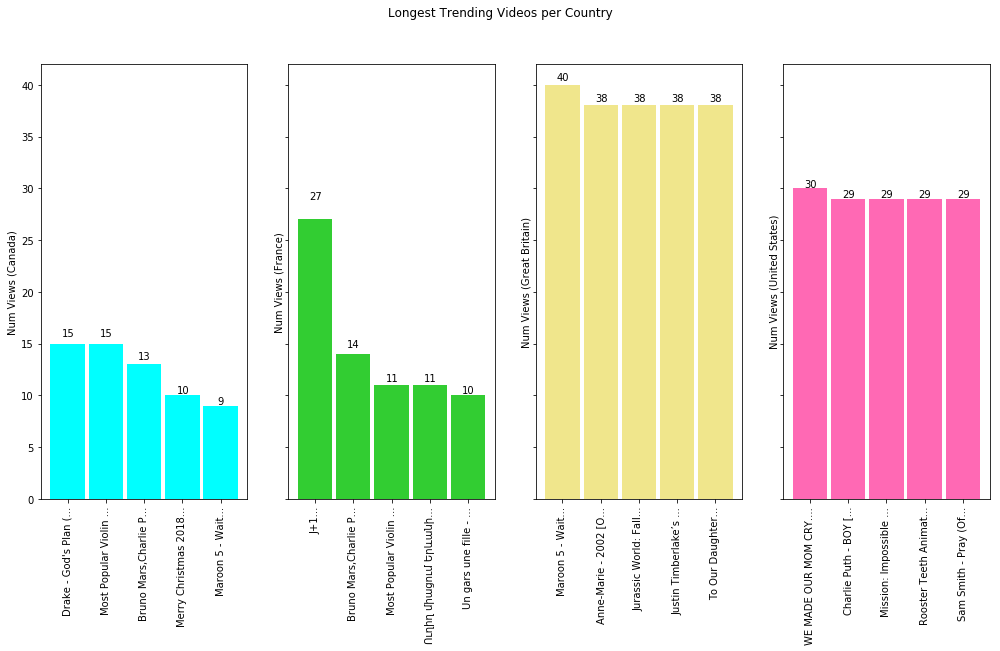

In [35]:
#Longest trending videos in each country
trendingGroup = datadf.groupby(['Country','Title']).agg({'Date Trending':'count'})
trendingGroup = trendingGroup['Date Trending'].groupby(level=0, group_keys=False)
caVids = []
caDays = []
frVids = []
frDays = []
gbVids = []
gbDays = []
usVids = []
usDays = []
#print(trendingGroup.nlargest(5))
for country, group in trendingGroup:
    group = group.nlargest(5)
    group = group.reset_index()
    if country=='CA':
        for vids in group['Title']:
            caVids.append(vids)
        for num in group['Date Trending']:
            caDays.append(num)
    if country == 'FR':
        for vids in group['Title']:
            frVids.append(vids)
        for num in group['Date Trending']:
            frDays.append(num)
    if country == 'GB':
        for vids in group['Title']:
            gbVids.append(vids)
        for num in group['Date Trending']:
            gbDays.append(num)
    if country == 'US':
        for vids in group['Title']:
            usVids.append(vids)
        for num in group['Date Trending']:
            usDays.append(num)

vids = [caVids,frVids,gbVids,usVids]
for index,each in enumerate(vids):
    for idx,videoname in enumerate(each):
        newname = videoname[:20] + '...'
        vids[index][idx]=newname

print(usVids)
print(usDays)

xaxis=np.arange(5)
fig, axes = plt.subplots(1,4,figsize=[17,8],sharey=True)
#0 is canada
#1 is France
#2 is GB
#3 is US

colors = ['cyan','limegreen','khaki','hotpink']
#fontcolors = ['black','white','black','black']
labelheight = [1.1,1.1,1.03,1.03]
days = [caDays,frDays,gbDays,usDays]
def autolabel(days):
    idxNum = 0
    for countryarray in days:
        labelcount=0
        bars = axes[idxNum].bar(xaxis,countryarray,color=colors[idxNum],width=-0.9)
        for eachbar in bars:
            height = eachbar.get_height()
            axes[idxNum].text(eachbar.get_x() + eachbar.get_width()/2.05, labelheight[idxNum]*height,
                   countryarray[labelcount],
                    ha='center',va='top',
                   color='black', fontname='Helvetica')
            labelcount+=1
        idxNum+=1
# Call functions to implement the function calls
autolabel(days)

axes[0].set_xticks(np.arange(0,5,1))
axes[1].set_xticks(np.arange(0,5,1))
axes[2].set_xticks(np.arange(0,5,1))
axes[3].set_xticks(np.arange(0,5,1))

axes[0].set_ylabel('Num Views (Canada)')
axes[1].set_ylabel('Num Views (France)')
axes[2].set_ylabel('Num Views (Great Britain)')
axes[3].set_ylabel('Num Views (United States)')

axes[0].set_xticklabels(caVids,rotation=90)
axes[1].set_xticklabels(frVids,rotation=90)
axes[2].set_xticklabels(gbVids,rotation=90)
axes[3].set_xticklabels(usVids,rotation=90)
fig.suptitle('Longest Trending Videos per Country')
fig.savefig('LongestTrendingVids.png')